# Results

## Setup

### Constants

In [ ]:
RESULTS_FILE_NAME = "results.csv"
DATASETS = ("ML-100K", "ML-1M")
METRIC = "RMSE"
X_LABEL = "Dimensions"

BASELINE_NAME = "G-Local-K Baseline"
MF_PREFIX = "MF"
HYBRID_PREFIX = "G-Local-K + MF"
# Get name without prefix
is_hybrid_func = lambda name: name.startswith(HYBRID_PREFIX)
get_name_func = lambda name: int(name[len(HYBRID_PREFIX):]) if is_hybrid_func(name) else int(name[len(MF_PREFIX):])

### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the results

In [3]:
results_df = pd.read_csv(RESULTS_FILE_NAME)
results_df_dict = {dataset_name: results_df[results_df["Dataset"] == dataset_name].drop(columns=["Dataset"]).reset_index(drop=True)
                    for dataset_name in DATASETS}

In [11]:
results_df_dict["ML-1M"]["Model"]

0    G-Local-K Baseline
1                 MF 25
2                 MF 50
3                 MF 75
4                MF 100
5     G-Local-K + MF 25
6     G-Local-K + MF 50
7     G-Local-K + MF 75
8    G-Local-K + MF 100
Name: Model, dtype: object

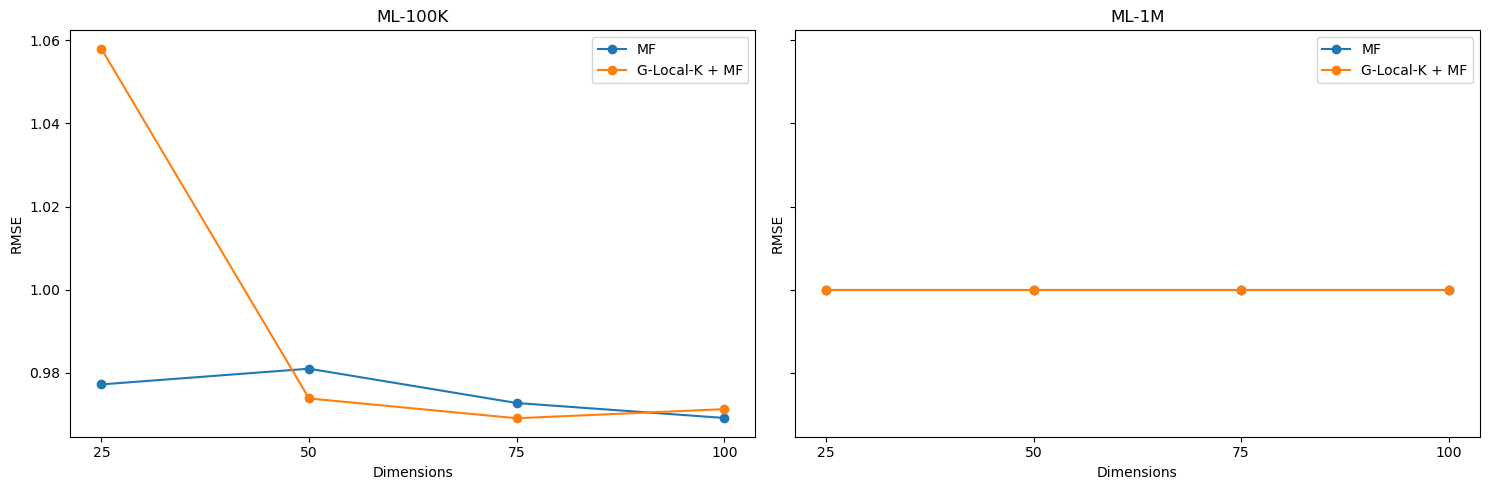

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=len(results_df_dict), figsize=(15, 5), sharey=True)


if len(results_df_dict) == 1:
    axes = [axes]  # Ensure axes is iterable when there's only one subplot

for ax, (dataset_name, dataset_df) in zip(axes, results_df_dict.items()):
    dataset_df = dataset_df[dataset_df["Model"] != BASELINE_NAME]
    X_MF = dataset_df[dataset_df["Model"].apply(lambda name: not is_hybrid_func(name))]["Model"].apply(get_name_func)
    Y_MF = dataset_df[dataset_df["Model"].apply(lambda name: not is_hybrid_func(name))][METRIC]
    X_HYBRID = dataset_df[dataset_df["Model"].apply(is_hybrid_func)]["Model"].apply(get_name_func)
    Y_HYBRID = dataset_df[dataset_df["Model"].apply(is_hybrid_func)][METRIC]

    ax.plot(X_MF, Y_MF, label=MF_PREFIX, marker='o')
    ax.plot(X_HYBRID, Y_HYBRID, label=HYBRID_PREFIX, marker='o')
    ax.set_title(dataset_name)
    ax.set_xlabel(X_LABEL)
    ax.set_ylabel(METRIC)
    ax.set_xticks(range(25, 101, 25))
    # 
    ax.legend()

plt.tight_layout()
plt.show()